In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn.metrics as met

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data


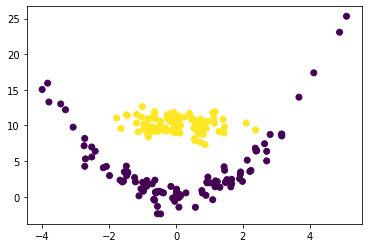

In [2]:
np.random.seed(242)
data= generate_data(200)
np.random.seed(12)
testdata = generate_data(100)
xtrain=data[:,0:2]
x1train=data[:,0]
x2train=data[:,1]
ytrain=data[:,2]

plt.scatter(x1train,x2train, c=ytrain)



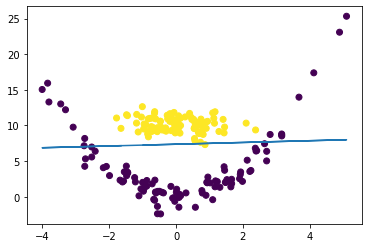

In [3]:
import sklearn.linear_model as linm

LogRegModel=linm.LogisticRegression()
LogRegModel.fit(xtrain,ytrain)
LogRegModel.predict(xtrain)
plt.scatter(x1train,x2train,c=ytrain)
x2 = (-LogRegModel.intercept_ -LogRegModel.coef_[0][0]*x1train) / LogRegModel.coef_[0][1]
plt.plot(x1train, x2)




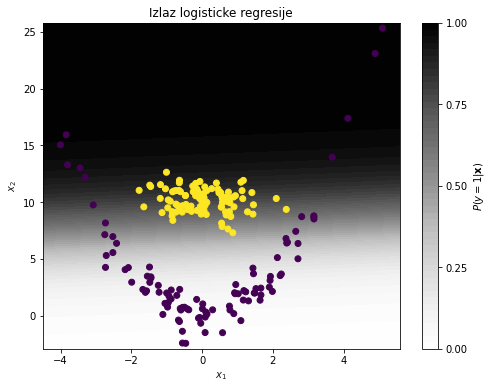

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(data[:,0])-0.5:max(data[:,0])+0.5:.05,
min(data[:,1])-0.5:max(data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = LogRegModel.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.scatter(x1train, x2train, c=ytrain)

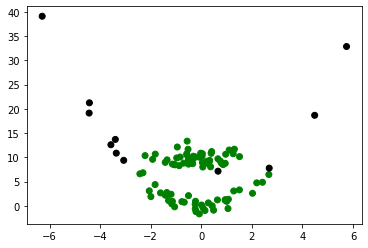

In [5]:
xtest = testdata[:, 0:2]
ytest = testdata[:, 2]
x1test = testdata[:, 0]
x2test = testdata[:, 1]
ypredicted = LogRegModel.predict(xtest)
colors = []
for i in range(100):
  if int(ytest[i]) == int(ypredicted[i]):
    colors.append('green')
  else:
    colors.append('black')

plt.scatter(x1test, x2test, c=colors)


In [6]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


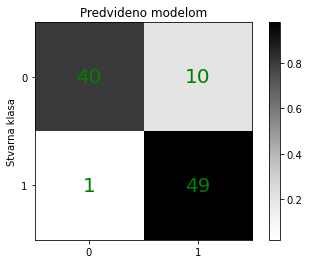

[[40 10]
 [ 1 49]]
Acc = 0.89
Misc rate = 0.10999999999999999
Precision = 0.8
Recall = 0.975609756097561
Spec = 0.8305084745762712


In [7]:
conf_mat = met.confusion_matrix(ytest, ypredicted)
plot_confusion_matrix(conf_mat)

accuracy = met.accuracy_score(ytest, ypredicted)

print(conf_mat)

tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

misclass_rate = 1 - accuracy
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn / (tn+fp)

print("Acc = " + str(accuracy))
print("Misc rate = " + str(misclass_rate))
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("Spec = " + str(specificity))

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias = False)
data_train_new = poly.fit_transform(data[:,0:2])
data_test_new = poly.fit_transform(testdata[:,0:2])



xtrain_new=data_train_new[:,0:5]
ytrain_new=ytrain

xtest_new=data_test_new[:,0:5]
ytest_new=ytest


In [16]:
import sklearn.linear_model as linm

LogRegModel_new=linm.LogisticRegression()
LogRegModel_new.fit(xtrain_new,ytrain_new)
LogRegModel_new.predict(xtrain_new)
ypredicted_new=LogRegModel_new.predict(xtest_new)



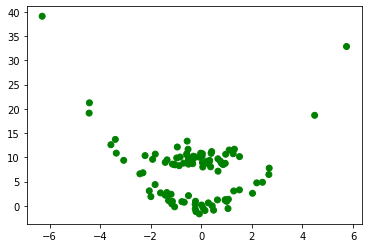

In [17]:
ypredicted = LogRegModel.predict(xtest)
colors = []
for i in range(100):
    if int(ytest_new[i]) == int(ypredicted_new[i]):
        colors.append('green')
    else:
        colors.append('black')

plt.scatter(x1test, x2test, c=colors)


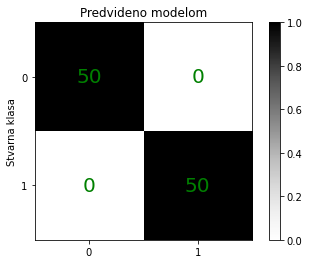

Accuracy = 1.0
Misclass rate = 0.0
Precision = 1.0
Recall = 1.0
Specificity = 1.0


In [18]:
c_matrix2 = met.confusion_matrix(ytest_new, ypredicted_new)
plot_confusion_matrix(c_matrix2)
accuracy2 = met.accuracy_score(ytest_new, ypredicted_new)
misclass_rate2 = 1 - accuracy2
precision2 = met.precision_score(ytest_new, ypredicted_new)
recall2 = met.recall_score(ytest_new, ypredicted_new)
tn, fp, fn, tp = met.confusion_matrix(ytest_new, ypredicted_new).ravel()
specificity2 = tn / (tn+fp)

print("Accuracy = " + str(accuracy2))
print("Misclass rate = " + str(misclass_rate2))
print("Precision = " + str(precision2))
print("Recall = " + str(recall2))
print("Specificity = " + str(specificity2))
